In [1]:
import sys
sys.path.append('..')

import warnings
warnings.filterwarnings("ignore", ".*does not have many workers.*")
warnings.filterwarnings("ignore", ".*IProgress*")

In [10]:
import pytorch_lightning as pl
from ct.model.ct_mnist import CT_MNIST
from ct.data.mnist import MNIST

mnist = MNIST(batch_size=256, root='../data')
mnist.setup()
model = CT_MNIST()
trainer = pl.Trainer(max_epochs=2, val_check_interval=100, logger=None)
trainer.fit(model=model, datamodule=mnist)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/jakub/.pyenv/versions/3.10.4/envs/dd2412-project/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:604: UserWarning: Checkpoint directory /Users/jakub/git/uni/dd2412-project/notebooks/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name  | Type           | Params
-----------------------------------------
0 | model | CT_MNIST_torch | 262 K 
-----------------------------------------
262 K     Trainable params
0         Non-trainable params
262 K     Total params
1.049     Total estimated model params size (MB)


Epoch 1: 100%|██████████| 255/255 [03:05<00:00,  1.38it/s, loss=0.248, train_acc=0.889, val_acc=0.984]

`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 1: 100%|██████████| 255/255 [03:05<00:00,  1.38it/s, loss=0.248, train_acc=0.889, val_acc=0.984]


In [11]:
test = mnist.test_dataloader()
for image, (target_class, target_concept) in test:
  break

pred_class, attn = model.model(image)

attn = attn.detach().squeeze(2).mean(1) # Squeeze over patches and average over heads

In [35]:
import matplotlib.pyplot as plt

def plot_prediction(idx=0):
  fig = plt.figure()
  gs = fig.add_gridspec(2,2)

  ax1 = fig.add_subplot(gs[:, 0])
  ax1.imshow(image[idx].permute(1, 2, 0))
  prediction2class = {0: 'odd', 1: 'even'}
  prediction = ((pred_class[idx]>0.0)*1).item()
  ax1.set(title='Prediction: ' + prediction2class[prediction], yticks=[], xticks=[])

  ax2 = fig.add_subplot(gs[0, 1])
  ax2.imshow(target_concept[idx].unsqueeze(0))
  ax2.set(title='target_concept', yticks=[], xticks=range(10))

  ax3 = fig.add_subplot(gs[1, 1])
  ax3.imshow(attn[idx].unsqueeze(0))
  ax3.set(title='pred_concept', yticks=[], xticks=range(10))

  plt.show()

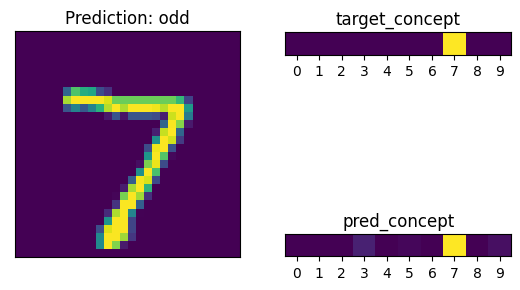

In [36]:
plot_prediction(0)

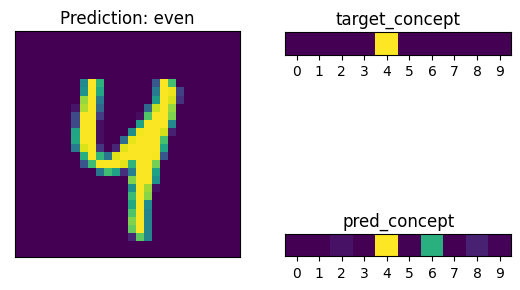

In [37]:
plot_prediction(42)

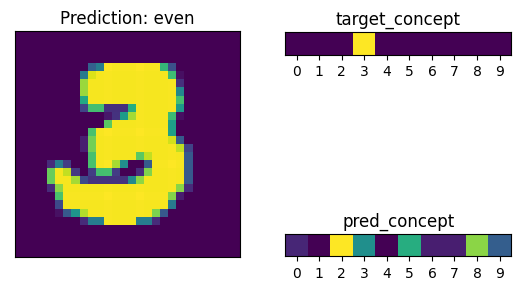

In [38]:
plot_prediction(200)